In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.01
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_10_51_300_0.01_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_10_51_300_0.01_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.1227

Best Fitness:	611.5123
Solution:	600.0000
Diff:		11.5123

[0:00:05][----------] 1.96% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.2872

Best Fitness:	612.4176
Solution:	600.0000
Diff:		12.4176

[0:00:10][----------] 3.92% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.8345

Best Fitness:	609.0875
Solution:	600.0000
Diff:		9.0875

[0:00:15][#---------] 5.88% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9885

Best Fitness:	611.3541
Solution:	600.0000
Diff:		11.3541

[0:00:20][#---------] 7.84% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.8024

Best Fitness:	612.3115
Solution:	600.0000
Diff:		12.3115

[0:00:25][#---------] 9.80% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9168

Best Fitness:	612.2438
Solution:	600.0000
Diff:		12.2438

[0:00:31][#---------] 11.76% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9927

Best Fitness:	611.2455
Solution:	600.0000
Diff:		11.2455

[0:00:35][#---------] 13.73% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9082

Best Fitness:	611.5461
Solution:	600.0000
Diff:		11.5461

[0:00:40][##--------] 15.69% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.1655

Best Fitness:	611.3513
Solution:	600.0000
Diff:		11.3513

[0:00:44][##--------] 17.65% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9838

Best Fitness:	609.8763
Solution:	600.0000
Diff:		9.8763

[0:00:48][##--------] 19.61% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.2814

Best Fitness:	611.8058
Solution:	600.0000
Diff:		11.8058

[0:00:53][##--------] 21.57% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.8498

Best Fitness:	611.3834
Solution:	600.0000
Diff:		11.3834

[0:00:57][##--------] 23.53% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9143

Best Fitness:	610.1193
Solution:	600.0000
Diff:		10.1193

[0:01:02][###-------] 25.49% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.0661

Best Fitness:	610.8768
Solution:	600.0000
Diff:		10.8768

[0:01:06][###-------] 27.45% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.2624

Best Fitness:	611.3478
Solution:	600.0000
Diff:		11.3478

[0:01:11][###-------] 29.41% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9454

Best Fitness:	611.5173
Solution:	600.0000
Diff:		11.5173

[0:01:15][###-------] 31.37% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.2890

Best Fitness:	611.6066
Solution:	600.0000
Diff:		11.6066

[0:01:20][###-------] 33.33% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.2484

Best Fitness:	610.9218
Solution:	600.0000
Diff:		10.9218

[0:01:27][####------] 35.29% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.6487

Best Fitness:	610.7939
Solution:	600.0000
Diff:		10.7939

[0:01:31][####------] 37.25% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.0796

Best Fitness:	612.0466
Solution:	600.0000
Diff:		12.0466

[0:01:38][####------] 39.22% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9175

Best Fitness:	610.7534
Solution:	600.0000
Diff:		10.7534

[0:01:41][####------] 41.18% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.1530

Best Fitness:	610.9674
Solution:	600.0000
Diff:		10.9674

[0:01:44][####------] 43.14% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.2426

Best Fitness:	611.3831
Solution:	600.0000
Diff:		11.3831

[0:01:51][#####-----] 45.10% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.8883

Best Fitness:	611.4727
Solution:	600.0000
Diff:		11.4727

[0:01:55][#####-----] 47.06% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.2120

Best Fitness:	609.0844
Solution:	600.0000
Diff:		9.0844

[0:01:58][#####-----] 49.02% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.3124

Best Fitness:	612.3235
Solution:	600.0000
Diff:		12.3235

[0:02:04][#####-----] 50.98% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9281

Best Fitness:	608.5189
Solution:	600.0000
Diff:		8.5189

[0:02:08][#####-----] 52.94% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9733

Best Fitness:	611.1853
Solution:	600.0000
Diff:		11.1853

[0:02:13][#####-----] 54.90% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.4189

Best Fitness:	611.8061
Solution:	600.0000
Diff:		11.8061

[0:02:21][######----] 56.86% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9979

Best Fitness:	611.9891
Solution:	600.0000
Diff:		11.9891

[0:02:24][######----] 58.82% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.3159

Best Fitness:	609.8084
Solution:	600.0000
Diff:		9.8084

[0:02:27][######----] 60.78% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.7342

Best Fitness:	610.3480
Solution:	600.0000
Diff:		10.3480

[0:02:31][######----] 62.75% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.8757

Best Fitness:	610.4046
Solution:	600.0000
Diff:		10.4046

[0:02:34][######----] 64.71% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.7202

Best Fitness:	611.0998
Solution:	600.0000
Diff:		11.0998

[0:02:37][#######---] 66.67% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.7877

Best Fitness:	611.4791
Solution:	600.0000
Diff:		11.4791

[0:02:41][#######---] 68.63% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.8709

Best Fitness:	610.8768
Solution:	600.0000
Diff:		10.8768

[0:02:45][#######---] 70.59% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9271

Best Fitness:	610.5776
Solution:	600.0000
Diff:		10.5776

[0:02:51][#######---] 72.55% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.6024

Best Fitness:	611.6118
Solution:	600.0000
Diff:		11.6118

[0:02:56][#######---] 74.51% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9802

Best Fitness:	610.9240
Solution:	600.0000
Diff:		10.9240

[0:03:02][########--] 76.47% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.0883

Best Fitness:	609.3166
Solution:	600.0000
Diff:		9.3166

[0:03:05][########--] 78.43% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.0869

Best Fitness:	611.6768
Solution:	600.0000
Diff:		11.6768

[0:03:10][########--] 80.39% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.0680

Best Fitness:	612.3786
Solution:	600.0000
Diff:		12.3786

[0:03:13][########--] 82.35% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9516

Best Fitness:	612.5077
Solution:	600.0000
Diff:		12.5077

[0:03:16][########--] 84.31% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.9829

Best Fitness:	611.3064
Solution:	600.0000
Diff:		11.3064

[0:03:22][#########-] 86.27% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.0013

Best Fitness:	611.5852
Solution:	600.0000
Diff:		11.5852

[0:03:27][#########-] 88.24% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.8896

Best Fitness:	609.9585
Solution:	600.0000
Diff:		9.9585

[0:03:30][#########-] 90.20% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.7176

Best Fitness:	611.5787
Solution:	600.0000
Diff:		11.5787

[0:03:34][#########-] 92.16% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.0450

Best Fitness:	610.4066
Solution:	600.0000
Diff:		10.4066

[0:03:38][#########-] 94.12% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.0622

Best Fitness:	609.9148
Solution:	600.0000
Diff:		9.9148

[0:03:45][##########] 96.08% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	616.8533

Best Fitness:	611.0724
Solution:	600.0000
Diff:		11.0724

[0:03:48][##########] 98.04% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	617.0942

Best Fitness:	611.1680
Solution:	600.0000
Diff:		11.1680

[0:03:51][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:03:51

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
0,12.445177,13.775948,13.818845,13.862568,14.06577,14.809244,14.910519,14.977868,15.008277,15.037558,...,12.961689,17.15268,17.739165,17.426593,13.111645,20.894955,20.492269,19.791673,16.110711,50
1,12.445177,13.775948,13.818845,13.862568,14.06577,14.809244,14.910519,12.322200,15.008277,15.037558,...,12.961689,17.15268,17.739165,17.426593,13.111645,19.770513,18.531757,18.326809,16.110711,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 11.51226788134477

Best error for run 1: 12.417645826148032

Best error for run 2: 9.087513479830704

Best error for run 3: 11.35406989756325

Best error for run 4: 12.311547789870929

Best error for run 5: 12.243841788362147

Best error for run 6: 11.245453377189506

Best error for run 7: 11.546108051404985

Best error for run 8: 11.35132018578338

Best error for run 9: 9.8762904638495

Best error for run 10: 11.805829135180147

Best error for run 11: 11.383418557686127

Best error for run 12: 10.119337697031824

Best error for run 13: 10.876760122434348

Best error for run 14: 11.347815488971833

Best error for run 15: 11.517331710483973

Best error for run 16: 11.606647593873845

Best error for run 17: 10.921763060831722

Best error for run 18: 10.793896854887862

Best error for run 19: 12.046609513477733

Best error for run 20: 10.753417517781259

Best error for run 21: 10.967388153349248

Best error for run 22: 11.383109606631592

Best error for run 23: 11.472726124333121

Best error for run 24: 9.08436688380516

Best error for run 25: 12.323463931143351

Best error for run 26: 8.518891010079642

Best error for run 27: 11.185319635322912

Best error for run 28: 11.806066632286502

Best error for run 29: 11.989133658840046

Best error for run 30: 9.808429799444411

Best error for run 31: 10.347974400683825

Best error for run 32: 10.404564226596904

Best error for run 33: 11.09978358764829

Best error for run 34: 11.47909240016645

Best error for run 35: 10.876812358862708

Best error for run 36: 10.57758295953272

Best error for run 37: 11.611790364847593

Best error for run 38: 10.92404236522259

Best error for run 39: 9.316641651371924

Best error for run 40: 11.67681659437153

Best error for run 41: 12.37863899953777

Best error for run 42: 12.507734476245219

Best error for run 43: 11.306379271362289

Best error for run 44: 11.585199156820181

Best error for run 45: 9.958514493361236

Best error for run 46: 11.578678564981487

Best error for run 47: 10.406615678713024

Best error for run 48: 9.914803065626643

Best error for run 49: 11.072350753436922

Best error for run 50: 11.168047796224869

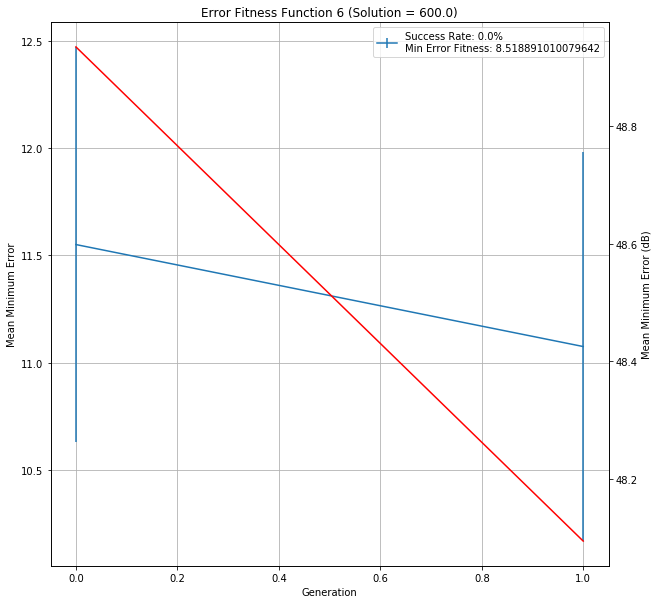

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_10_51_300_0.01_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,10,0.01,11.512268,12.417646,9.087513,11.35407,12.311548,12.243842,...,11.585199,9.958514,11.578679,10.406616,9.914803,11.072351,11.168048,11.075487,0:03:51,1200
